# Importing packages

In [94]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

# Loading data

In [95]:
train_df = pd.read_csv('loan-train.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [96]:
test_df = pd.read_csv('loan-test.csv')
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# EDA

In [97]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Dimensionality Reduction

## Columns with missing values

Finding columns with missing values greater than a specified threshold

In [98]:
missing_value_pct = train_df.isnull().sum() / train_df.shape[0]

col_names = [col for col in train_df.columns if col!="Loan_Status"]

elimination_candidates = []

for i in range(len(col_names)):
    if missing_value_pct[i] > 0.03:
        elimination_candidates.append(col_names[i])

print(elimination_candidates)

['Self_Employed', 'LoanAmount', 'Credit_History']


Showing some columns' distribution

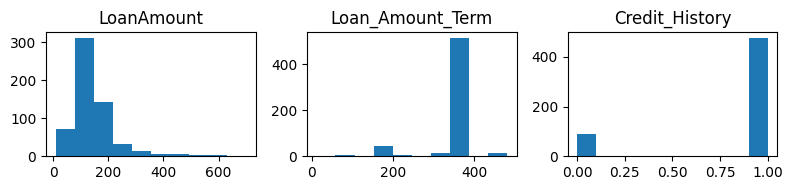

In [99]:
subplot_idx = 1

fig = plt.figure(figsize=(8, 2))

for col in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:

    plt.subplot(1, 3, subplot_idx)

    plt.hist(train_df[col])

    plt.title(col)

    subplot_idx += 1

plt.tight_layout()

Filling missing values of the columns shown in the plots above

In [100]:
for col in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    if col == 'LoanAmount':
        train_df[col].fillna(train_df[col].median(), inplace=True)
    else:
        train_df[col].fillna(train_df[col].mode()[0], inplace=True)

In [101]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Filtering based on variance

Replacing missing values

In [102]:
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Applying label encoding

In [103]:
# Removing loan id from the column names
col_names.remove('Loan_ID')

cat_feats = list(train_df[col_names].select_dtypes(include='object').columns)

le_dict = {}

for col in cat_feats:

    le = LabelEncoder()

    train_df[col] = le.fit_transform(train_df[col])

    temp_cat_list = list(le.classes_)

    le_dict[col] = {temp_cat_list[i]: i for i in range(len(temp_cat_list))}

le_dict

{'Gender': {'Female': 0, 'Male': 1},
 'Married': {'No': 0, 'Yes': 1},
 'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 3},
 'Education': {'Graduate': 0, 'Not Graduate': 1},
 'Self_Employed': {'No': 0, 'Yes': 1},
 'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2}}

Finding elimination candidates based on a variance threshold

In [104]:
VAR_THRESHOLD = 10

var_values = train_df[col_names].var()

var_elim_cols = []

for col in col_names:
    if var_values[col_names.index(col)] < VAR_THRESHOLD:
        var_elim_cols.append(col)

var_elim_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area']

## Filtering highly correlated columns

Creating correlation heatmap

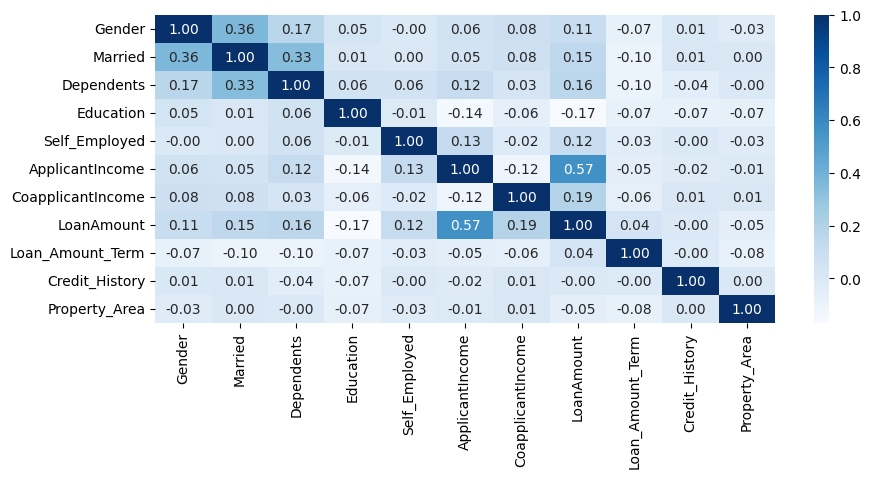

In [105]:
corr_mat = train_df[col_names].corr()

fig = plt.figure(figsize=(10, 4))
sns.heatmap(corr_mat, annot=True, cmap='Blues', fmt='.2f');

Finding features with high correlation

In [106]:
corr_idxs = np.tril_indices_from(corr_mat)

for coord in zip(*corr_idxs):
    corr_mat.iloc[coord[0], coord[1]] = np.nan

corr_df = corr_mat.stack().to_frame().reset_index()
corr_df.columns = ['feature1', 'feature2', 'corr']
corr_df['abs_corr'] = corr_df['corr'].abs()
corr_df.head()

,feature1,feature2,corr,abs_corr
0,Gender,Married,0.364569,0.364569
1,Gender,Dependents,0.172914,0.172914
2,Gender,Education,0.045364,0.045364
3,Gender,Self_Employed,-0.000525,0.000525
4,Gender,ApplicantIncome,0.058809,0.058809


In [107]:
CORR_THRESHOLD = 0.5

corr_df[corr_df['abs_corr'] > CORR_THRESHOLD]

,feature1,feature2,corr,abs_corr
41,ApplicantIncome,LoanAmount,0.565181,0.565181
